In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
stroke = pd.read_csv('train_2v.csv') 

In [3]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [4]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [5]:
stroke[('stroke')].value_counts()
#dataset is highly unbalanced and will affect the ML accuracy

0    42617
1      783
Name: stroke, dtype: int64

#### DATA UNDERSAMPLING PROCESS
With data undersampling we sought to randomly reduce the larger category of the stroke column(42,617)

In [6]:
shuffled_data = stroke.sample(frac=1,random_state=4)

In [7]:
stroke_df = stroke.loc[stroke['stroke'] == 1]

In [8]:
non_stroke_df = stroke.loc[stroke['stroke'] == 0].sample(n= 3500,random_state= 101)
# non-stroke sufferers were reduced to 3500 to balance the data set.

In [9]:
normalized_stroke = pd.concat([stroke_df, non_stroke_df])

#### EXPLORATORY ANALYSIS

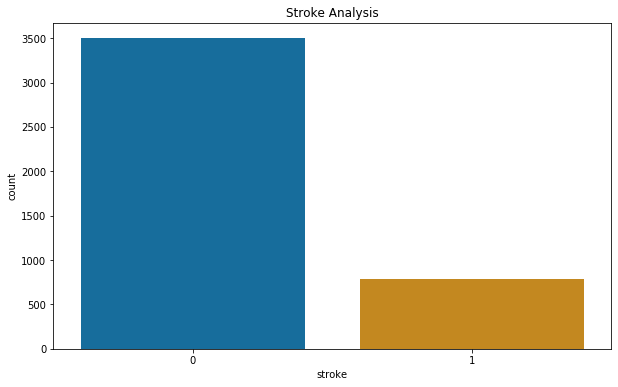

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot('stroke', data= normalized_stroke, palette= "colorblind")
plt.title('Stroke Analysis')
plt.show()
#Dataset split by stroke.

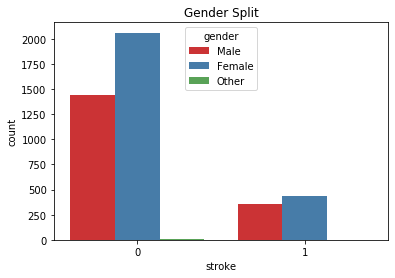

In [11]:
sns.countplot(x='stroke', hue = 'gender', data = normalized_stroke, palette = "Set1")
plt.title('Gender Split')
plt.show()
#Split by gender

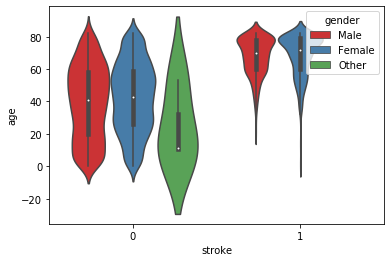

In [12]:
sns.violinplot(x = 'stroke', y = 'age', hue = "gender", data=normalized_stroke, palette= "Set1")
#Split by gender and age

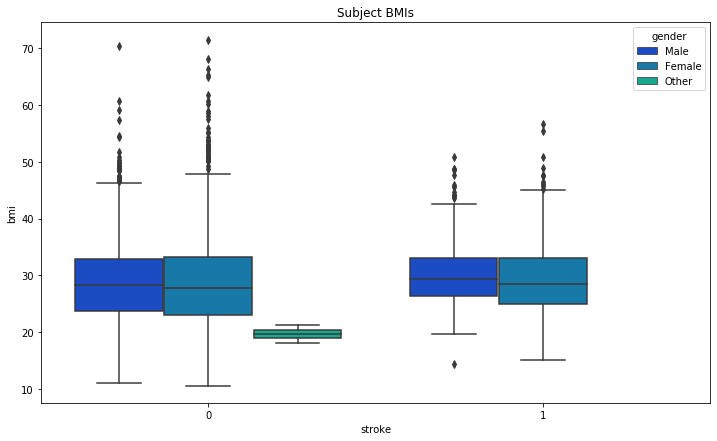

In [13]:
plt.figure(figsize=(12,7))
sns.boxplot(x = 'stroke', y = 'bmi', hue = 'gender', data= normalized_stroke, palette= "winter")
plt.title('Subject BMIs')
plt.show()

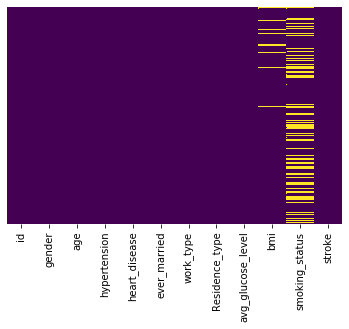

In [14]:
sns.heatmap(normalized_stroke.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [15]:
def input_bmi(cols):
    bmi = cols[0]
    stroke = cols [1]
   
    
    if pd.isnull(bmi):
        return 28.6
    else:
        return bmi
# Ifelse used to fill out missing BMI.

In [16]:
normalized_stroke['bmi'] = stroke[['bmi', 'stroke']].apply(input_bmi, axis=1)

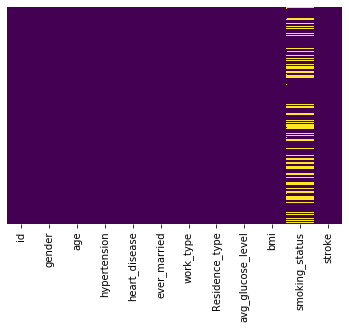

In [17]:
sns.heatmap(normalized_stroke.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# Heatmap showing totall filled BMI numbers.

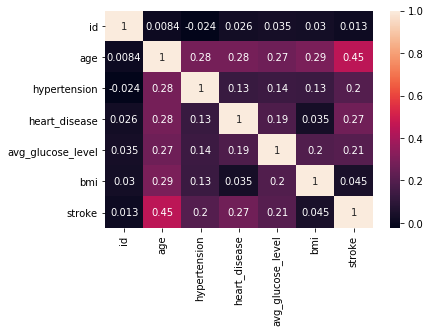

In [18]:
sns.heatmap(normalized_stroke.corr(), annot = True)

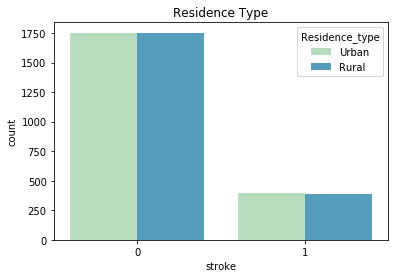

In [19]:
sns.countplot(x='stroke', hue = 'Residence_type', data =normalized_stroke, palette = 'GnBu')
plt.title('Residence Type')
plt.show()
# Count plot to check the prevalence of stroke across rural and urban areas

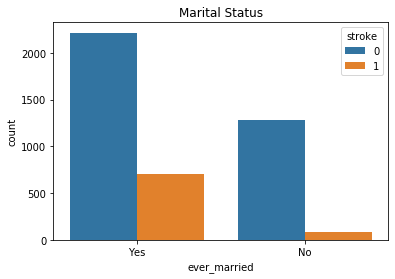

In [20]:
sns.countplot(x='ever_married', hue = 'stroke', data = normalized_stroke)
plt.title('Marital Status')
plt.show()
# Count plot to check the prevalence of stroke by marital status

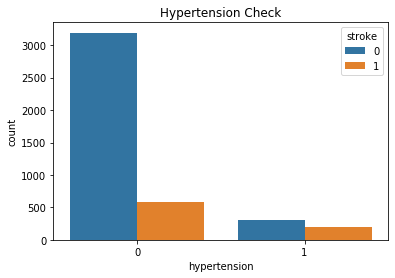

In [21]:
sns.countplot(x='hypertension', hue = 'stroke', data = normalized_stroke)
plt.title('Hypertension Check')
plt.show()
# Count plot to check subjects with/without hypertension and stroke

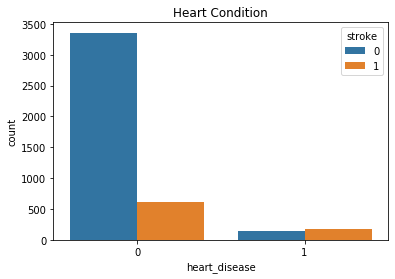

In [22]:
sns.countplot(x='heart_disease', hue = 'stroke', data = normalized_stroke)
plt.title('Heart Condition')
plt.show()
# Count plot to check subjects with/without heart disease and stroke

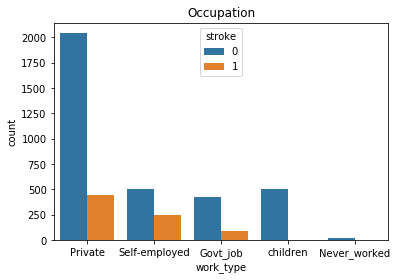

In [23]:
sns.countplot(x='work_type', hue = 'stroke', data = normalized_stroke)
plt.title('Occupation')
plt.show()
# Count plot to check the prevalence of stroke by occupation

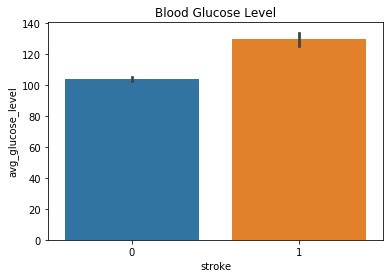

In [24]:
sns.barplot(x='stroke', y = 'avg_glucose_level', data = normalized_stroke)
plt.title('Blood Glucose Level')
plt.show()
# Count plot to check subjects with/without blood sugar and stroke

#### FEATURE ENGINEERING

In [25]:
residence = pd.get_dummies(normalized_stroke['Residence_type'])
residence.head()

,Rural,Urban
63,0,1
81,1,0
141,1,0
257,0,1
264,1,0


In [26]:
residence = pd.get_dummies(normalized_stroke["Residence_type"], drop_first= True)

In [27]:
normalized_stroke.drop(["Residence_type"], axis = 1, inplace = True)

In [28]:
normalized_stroke = pd.concat([normalized_stroke, residence], axis = 1)

In [29]:
normalized_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,Urban
63,9046,Male,67.0,0,1,Yes,Private,228.69,36.6,formerly smoked,1,1
81,51676,Female,61.0,0,0,Yes,Self-employed,202.21,28.6,never smoked,1,0
141,31112,Male,80.0,0,1,Yes,Private,105.92,32.5,never smoked,1,0
257,60182,Female,49.0,0,0,Yes,Private,171.23,34.4,smokes,1,1
264,1665,Female,79.0,1,0,Yes,Self-employed,174.12,24.0,never smoked,1,0


In [30]:
normalized_stroke.rename(columns={'Urban':'Residence_type'}, 
                 inplace=True)

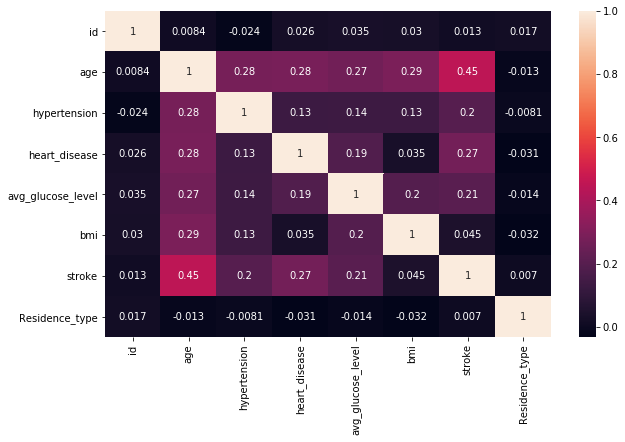

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(normalized_stroke.corr(), annot = True)

In [32]:
sex = pd.get_dummies(normalized_stroke['gender'])
sex = pd.get_dummies(normalized_stroke["gender"], drop_first= True)
normalized_stroke.drop(["gender"], axis = 1, inplace = True)
normalized_stroke = pd.concat([normalized_stroke, sex], axis = 1)

In [33]:
normalized_stroke.head()

,id,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,Residence_type,Male,Other
63,9046,67.0,0,1,Yes,Private,228.69,36.6,formerly smoked,1,1,1,0
81,51676,61.0,0,0,Yes,Self-employed,202.21,28.6,never smoked,1,0,0,0
141,31112,80.0,0,1,Yes,Private,105.92,32.5,never smoked,1,0,1,0
257,60182,49.0,0,0,Yes,Private,171.23,34.4,smokes,1,1,0,0
264,1665,79.0,1,0,Yes,Self-employed,174.12,24.0,never smoked,1,0,0,0


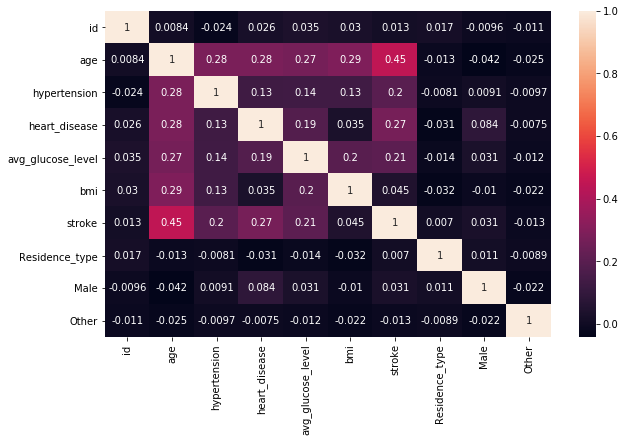

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(normalized_stroke.corr(), annot = True)

In [35]:
marital_status = pd.get_dummies(normalized_stroke['ever_married'])

In [36]:
marital_status = pd.get_dummies(normalized_stroke["ever_married"], drop_first= True)

In [37]:
normalized_stroke.drop(["ever_married", "smoking_status"], axis = 1, inplace = True)

In [38]:
normalized_stroke = pd.concat([normalized_stroke, marital_status], axis = 1)

In [39]:
normalized_stroke.head()

,id,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,stroke,Residence_type,Male,Other,Yes
63,9046,67.0,0,1,Private,228.69,36.6,1,1,1,0,1
81,51676,61.0,0,0,Self-employed,202.21,28.6,1,0,0,0,1
141,31112,80.0,0,1,Private,105.92,32.5,1,0,1,0,1
257,60182,49.0,0,0,Private,171.23,34.4,1,1,0,0,1
264,1665,79.0,1,0,Self-employed,174.12,24.0,1,0,0,0,1


In [40]:
normalized_stroke.rename(columns={'Yes':'marital_status'}, 
                 inplace=True)

In [41]:
occupation = pd.get_dummies(normalized_stroke['work_type'])

In [42]:
normalized_stroke.drop(["work_type"], axis = 1, inplace = True)

In [43]:
normalized_stroke = pd.concat([normalized_stroke, occupation], axis = 1)

In [44]:
normalized_stroke.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Residence_type,Male,Other,marital_status,Govt_job,Never_worked,Private,Self-employed,children
63,9046,67.0,0,1,228.69,36.6,1,1,1,0,1,0,0,1,0,0
81,51676,61.0,0,0,202.21,28.6,1,0,0,0,1,0,0,0,1,0
141,31112,80.0,0,1,105.92,32.5,1,0,1,0,1,0,0,1,0,0
257,60182,49.0,0,0,171.23,34.4,1,1,0,0,1,0,0,1,0,0
264,1665,79.0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0


In [45]:
normalized_stroke.drop(["avg_glucose_level"], axis = 1, inplace = True)

#### Smoking Status was dropped, but in hindsight under/over sampling could have been used instead of total elimination.

## Building a Logistic Regression Model

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
normalized_stroke.head()

,id,age,hypertension,heart_disease,bmi,stroke,Residence_type,Male,Other,marital_status,Govt_job,Never_worked,Private,Self-employed,children
63,9046,67.0,0,1,36.6,1,1,1,0,1,0,0,1,0,0
81,51676,61.0,0,0,28.6,1,0,0,0,1,0,0,0,1,0
141,31112,80.0,0,1,32.5,1,0,1,0,1,0,0,1,0,0
257,60182,49.0,0,0,34.4,1,1,0,0,1,0,0,1,0,0
264,1665,79.0,1,0,24.0,1,0,0,0,1,0,0,0,1,0


In [48]:
normalized_stroke.drop(["id"], axis = 1, inplace = True)

In [49]:
X = normalized_stroke.drop('stroke', axis = 1)
y = normalized_stroke['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)
from sklearn.linear_model import LogisticRegression

In [50]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
predictions = logmodel.predict(X_test)

## Evaluation
Checking for precision, recall, f1-score, classification report

In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1055
           1       0.57      0.38      0.46       230

    accuracy                           0.84      1285
   macro avg       0.72      0.66      0.68      1285
weighted avg       0.82      0.84      0.82      1285



In [54]:
logmodel.score(X_test, y_test)

0.8381322957198444

In [55]:
normalized_stroke.head()

,age,hypertension,heart_disease,bmi,stroke,Residence_type,Male,Other,marital_status,Govt_job,Never_worked,Private,Self-employed,children
63,67.0,0,1,36.6,1,1,1,0,1,0,0,1,0,0
81,61.0,0,0,28.6,1,0,0,0,1,0,0,0,1,0
141,80.0,0,1,32.5,1,0,1,0,1,0,0,1,0,0
257,49.0,0,0,34.4,1,1,0,0,1,0,0,1,0,0
264,79.0,1,0,24.0,1,0,0,0,1,0,0,0,1,0


In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
print(confusion_matrix(y_test,predictions))

[[990  65]
 [143  87]]


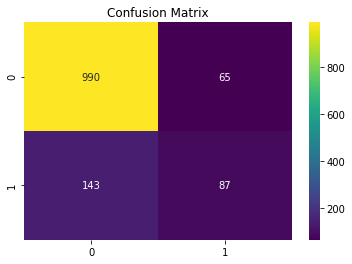

In [58]:
sns.heatmap(confusion_matrix(y_test,predictions), annot= True, cmap = 'viridis', fmt="2")
plt.title('Confusion Matrix')
plt.show()